In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', 100)

In [2]:
os.chdir(r'C:\Users\daenj\OneDrive\Desktop\Datasets\Capstone 2021')
os.getcwd()

'C:\\Users\\daenj\\OneDrive\\Desktop\\Datasets\\Capstone 2021'

In [3]:
data = pd.read_csv('application_data.csv')

In [4]:
#Our goal is to understand how data is used to minimize the risk of losing money when lending to customers.
#We'll start by cleaning and transforming the dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [5]:
data.shape

(307511, 122)

In [6]:
drop_cols=data.isnull().sum()
drop_cols=drop_cols[drop_cols.values>(0.25*len(data))] # checking for columns that are more than 25% null values
len(drop_cols)

50

In [7]:
drop_cols = list(drop_cols[drop_cols.values>0.25].index) #Returning the first instance of the value
data.drop(labels=drop_cols,axis=1,inplace=True)

In [8]:
data.shape

(307511, 72)

In [9]:
data.AMT_ANNUITY.median()

24903.0

In [10]:
data['AMT_ANNUITY']=data.AMT_ANNUITY.fillna(data.AMT_ANNUITY.median()) 
#Mean is biased by the values at the far end of the distibution
#Imputing missing values (using median)

In [11]:
data.FLAG_DOCUMENT_2.unique() #Dropping columns starting with 'FLAG_DOC*' not relevant

array([0, 1], dtype=int64)

In [12]:
# getting all columns starting with 'FLAG_DOC*'
flag_cols=[x for x in data if x.startswith('FLAG_DOC')] 

In [13]:
data.drop(labels=flag_cols,axis=1,inplace=True)

In [15]:
data.drop('NAME_TYPE_SUITE',axis=1,inplace=True)

data.AMT_GOODS_PRICE.median()

450000.0

In [16]:
# Imputing missing values with median for AMT_GOODS_PRICE
data['AMT_GOODS_PRICE']=data.AMT_GOODS_PRICE.fillna(data.AMT_GOODS_PRICE.median())

data.AMT_GOODS_PRICE.isnull().sum()

0

In [17]:
#dropping social circle columns, no clear description
data.drop(['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=1,inplace=True)

In [18]:
#Dropping the EXT columns. They contain normalized scores from an external data source. 
#These scores aren't relevant to our dataset
data.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

In [19]:
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].mean())
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].mean())

In [20]:
data['AMT_REQ_CREDIT_BUREAU_HOUR']=data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(data.AMT_REQ_CREDIT_BUREAU_HOUR.median)
data['AMT_REQ_CREDIT_BUREAU_DAY']=data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(data.AMT_REQ_CREDIT_BUREAU_DAY.median)
data['AMT_REQ_CREDIT_BUREAU_WEEK']=data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(data.AMT_REQ_CREDIT_BUREAU_WEEK.median)
data['AMT_REQ_CREDIT_BUREAU_MON']=data.AMT_REQ_CREDIT_BUREAU_MON.fillna(data.AMT_REQ_CREDIT_BUREAU_MON.median)
data['AMT_REQ_CREDIT_BUREAU_YEAR']=data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(data.AMT_REQ_CREDIT_BUREAU_YEAR.median)
data['AMT_REQ_CREDIT_BUREAU_QRT']=data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(data.AMT_REQ_CREDIT_BUREAU_QRT.median)

In [21]:
# Checking counts of CODE_GENDER
data.CODE_GENDER.value_counts() 
# We have 4 values for XNA which means not available. We can replace these values with mode for code_gender column.

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [22]:
data.CODE_GENDER=data.CODE_GENDER.replace('XNA','F') #Replacing 'XNA' values for CODE_GENDER with mode i.e 'F'

In [23]:
data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [24]:
#Checking Columns starting with 'DAYS_' for any errors
print(data.DAYS_EMPLOYED.unique())
print(data.DAYS_BIRTH.unique())
print(data.DAYS_REGISTRATION.unique())

[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]


In [25]:
#We have negative values in these columns. Fetching columns starting with 'DAYS' into a new dataframe.
days_cols=[x for x in data if x.startswith('DAYS')] 
days_cols

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [26]:
#Converting the values in columns starting with 'DAYS' to absolute
data[days_cols]= abs(data[days_cols])

In [27]:
# Checking whether the values are converted to absolute for few columns starting with 'DAYS' 
print(data.DAYS_EMPLOYED.unique())
print(data.DAYS_BIRTH.unique())
print(data.DAYS_REGISTRATION.unique())

[  637.  1188.   225. ... 12971. 11084.  8694.]
[ 9461. 16765. 19046. ...  7951.  7857. 25061.]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]


In [28]:
# Days_birth column has the age of the client in days and the datatype is float
# Converting the age to years and the datatype to int
data.DAYS_BIRTH = ((data.DAYS_BIRTH)/365).astype('int')

In [64]:
data.DAYS_BIRTH.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [30]:
#Let's bin the birth data to make it easier to use.
data['DAYS_BIRTH_BINS']=pd.cut(data.DAYS_BIRTH, bins=[18,40,60,100], labels=['Young','Middle_Age','Senior'])

In [31]:
data['DAYS_BIRTH_BINS'].value_counts()

Middle_Age    142220
Young         135923
Senior         29368
Name: DAYS_BIRTH_BINS, dtype: int64

In [32]:
#Let's repeat the binning process...
#The total income value will be split b/w 5 categories
data['INCOME_VAL'] = pd.cut(data.AMT_INCOME_TOTAL, bins=[0,50000,150000,300000,500000,1000000], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [33]:
data['INCOME_VAL'].value_counts()

Low          150772
Medium       129483
High          20037
Very Low       4517
Very High      2452
Name: INCOME_VAL, dtype: int64

In [34]:
data['INCOME_VAL']=data.INCOME_VAL.fillna('Medium')

In [35]:
#Target contains either 1 or 0 per ID. 1 means that the borrower has had a late payment. 0 means otherwise. 
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [36]:
#Finding the imbalance ratio of TARGET
data_target0 = data.loc[data.TARGET == 0]
data_target1 = data.loc[data.TARGET == 1]

In [37]:
print(data_target0.shape)
print(data_target1.shape)

(282686, 47)
(24825, 47)


In [63]:
#Imbalance ratio = 11.39
round(len(data_target0)/len(data_target1),2)

11.39

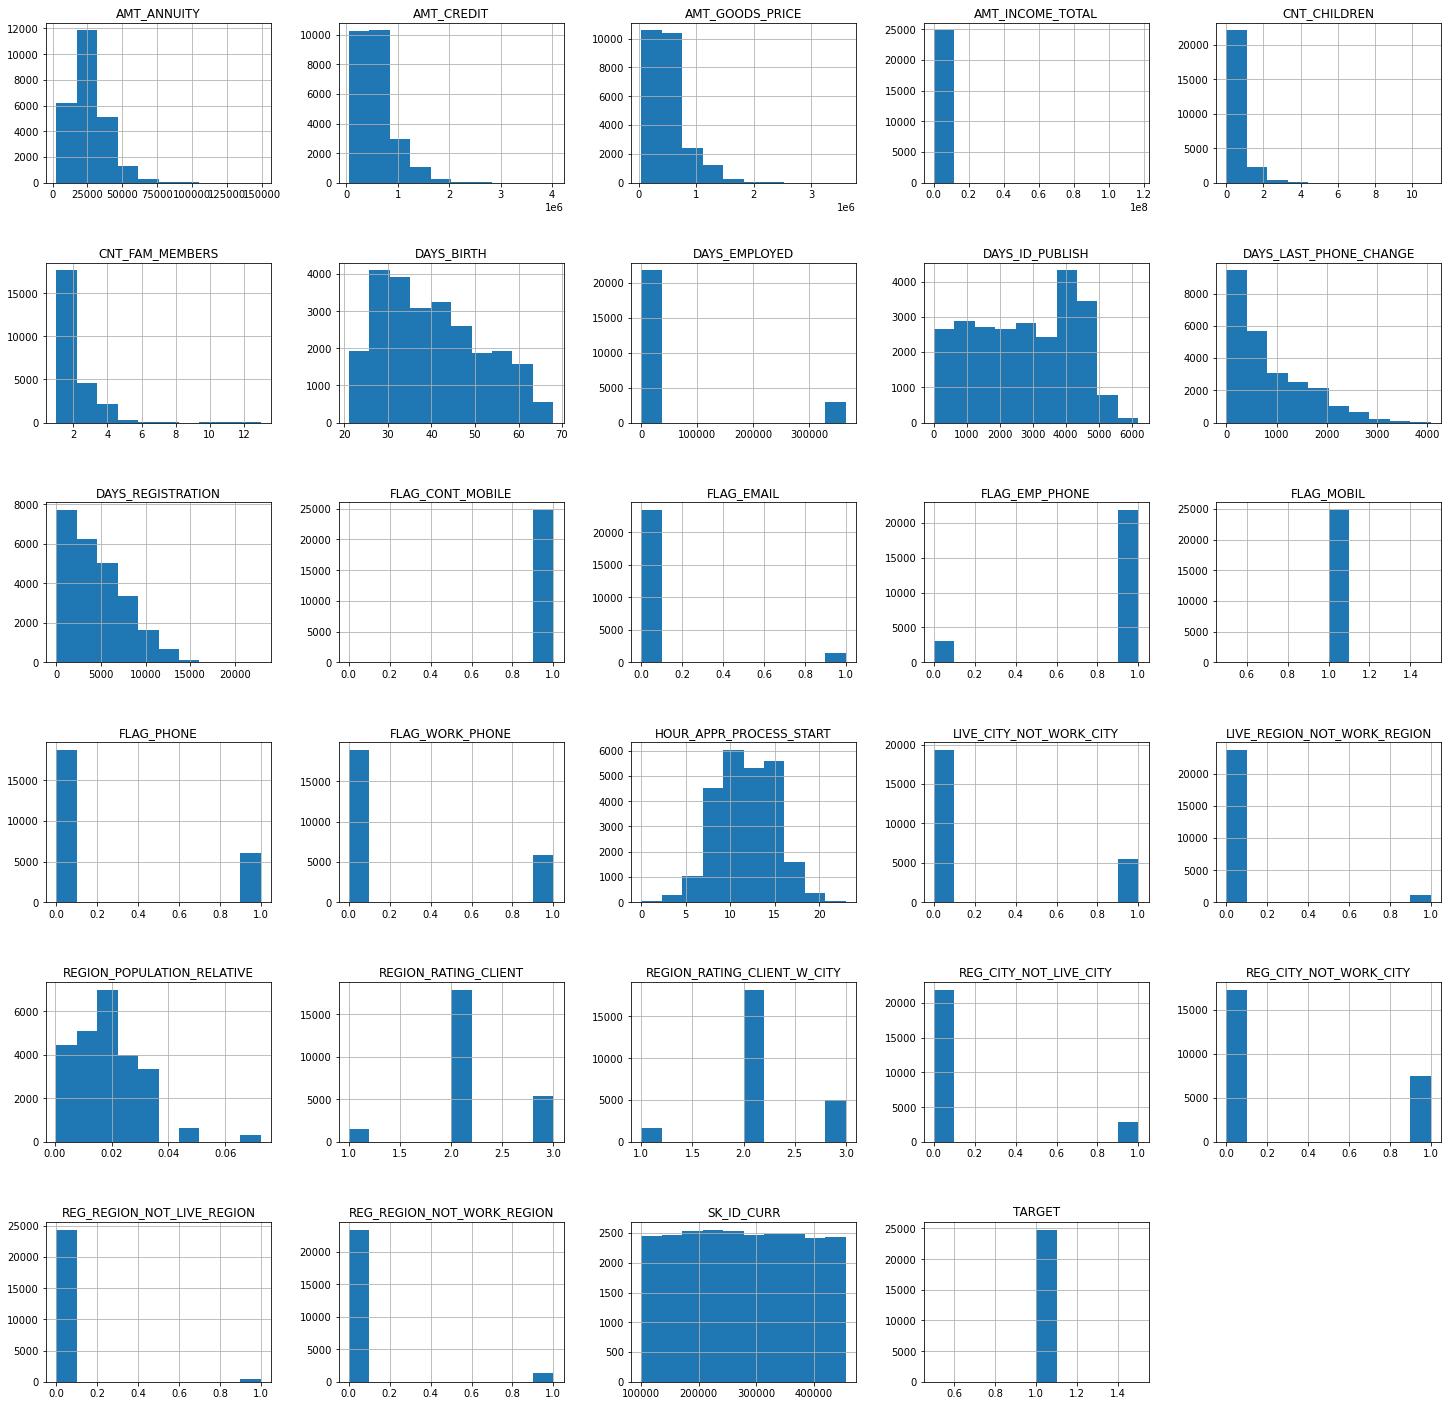

In [39]:
#Distribution of variables for customers with payment issues
data_target1.hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);

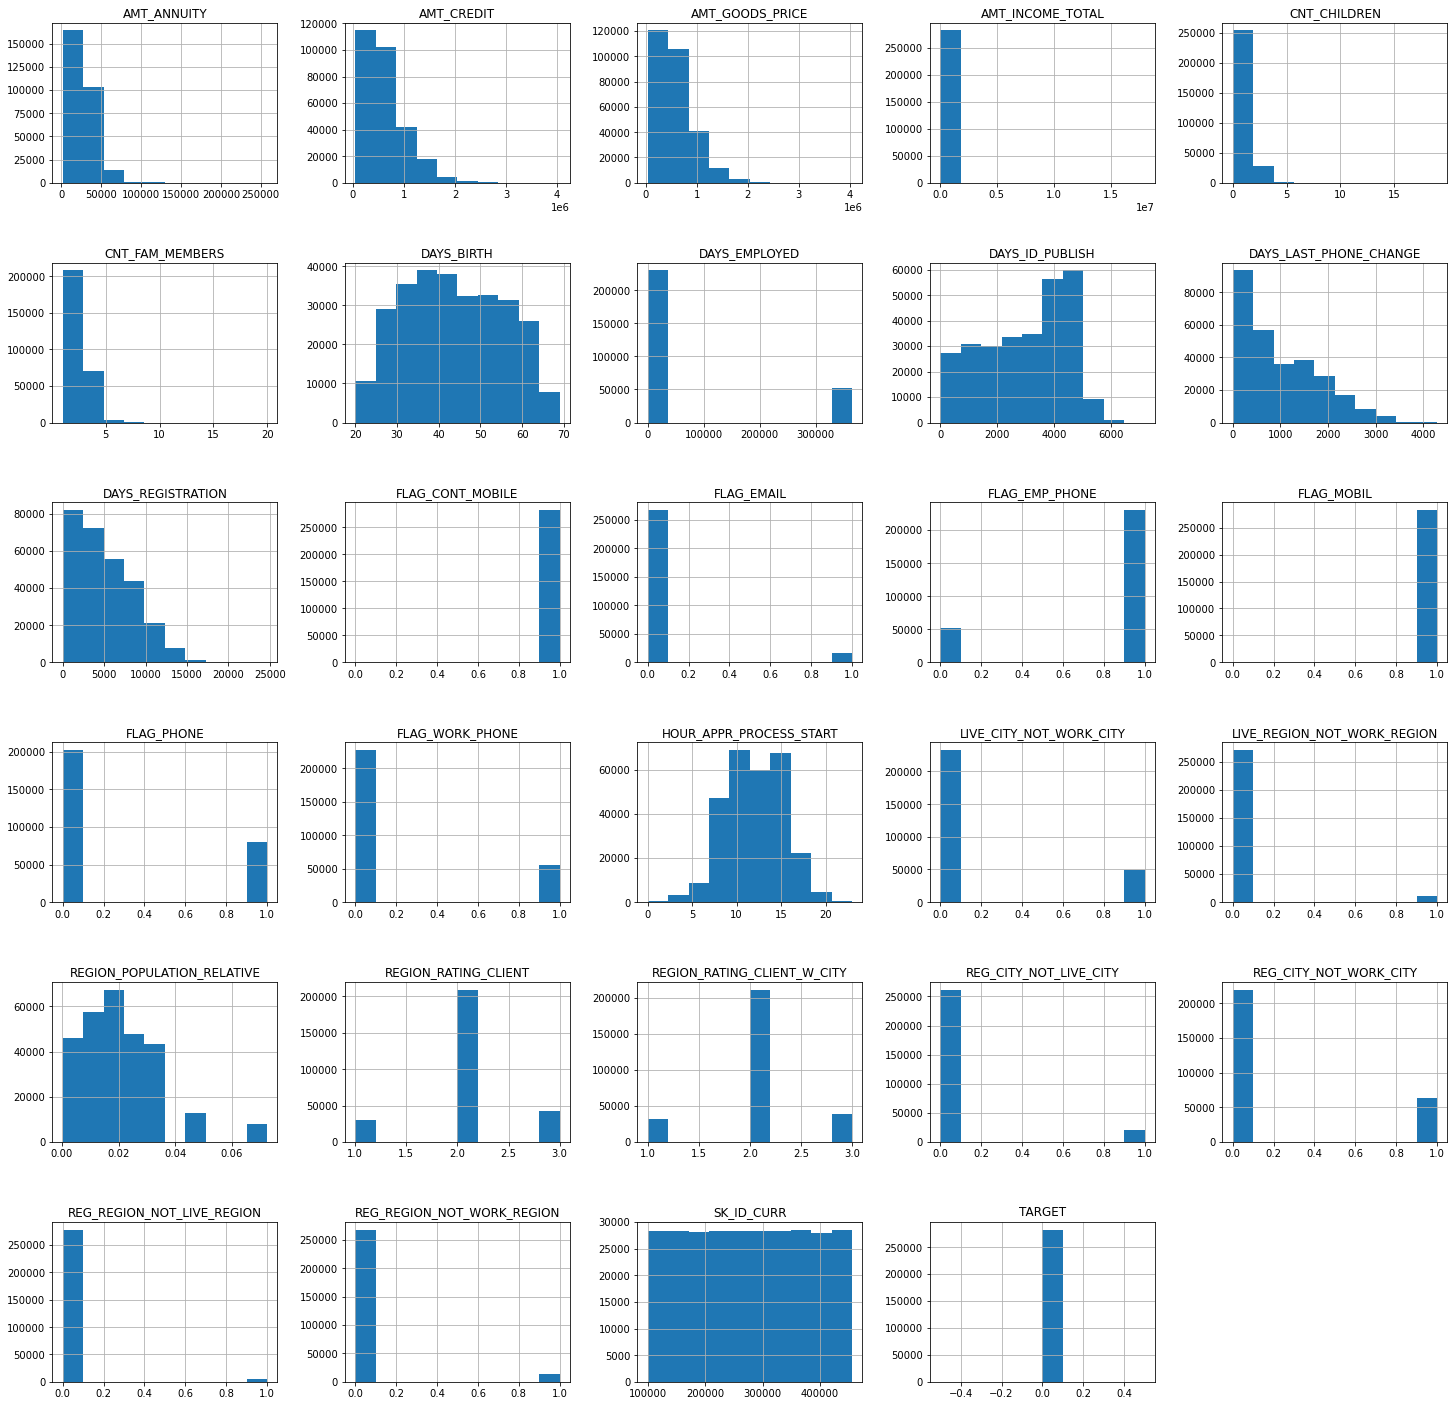

In [40]:
#Distribution of variables for customers without payment issues
data_target0.hist(figsize=(25,25))
plt.subplots_adjust(hspace=0.5);

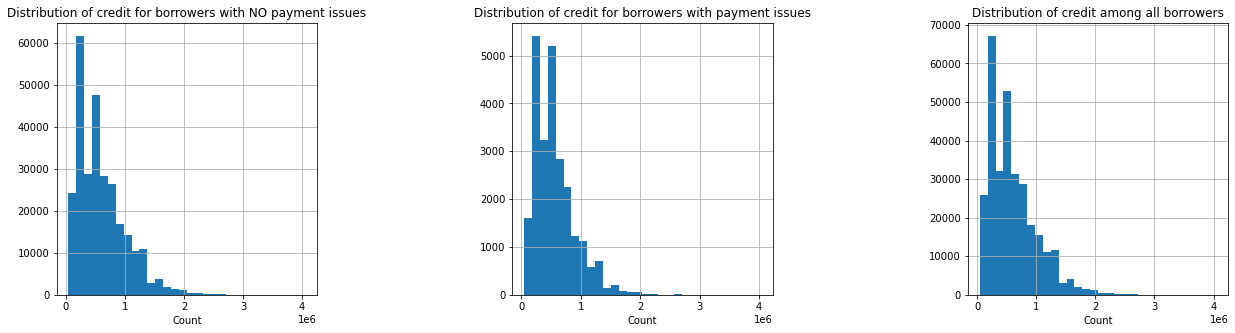

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(21,5))

data_target0.AMT_CREDIT.hist(ax=ax[0], bins =30)
ax[0].set_title('Distribution of credit for borrowers with NO payment issues')
ax[0].set_xlabel('Count')

data_target1.AMT_CREDIT.hist(ax=ax[1], bins=30)
ax[1].set_title('Distribution of credit for borrowers with payment issues')
ax[1].set_xlabel('Count')

data.AMT_CREDIT.hist(ax=ax[2], bins=30)
ax[2].set_title('Distribution of credit among all borrowers')
ax[2].set_xlabel('Count')
plt.subplots_adjust(wspace=0.75);